# Doğrusal Olmayan Regresyon Modelleri

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

## KNN

In [9]:
df = pd.read_csv("Hitters.csv")
df = df.dropna() #Eksik verilerden kurturuldu.
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']]) # One Hot Encoding yapıldı.
y = df["Salary"] #bağımlı değişkenimiz
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1) #kategorik değişkenleri dummy değişkenlerine çevirdik, bağımlı değişken ile bağımsız değişkenimizi ayırmış olduk.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [10]:
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
183,328.0,91.0,12.0,51.0,43.0,33.0,2.0,342.0,94.0,12.0,51.0,44.0,33.0,145.0,59.0,8.0,1,0,1
229,514.0,144.0,0.0,67.0,54.0,79.0,9.0,4739.0,1169.0,13.0,583.0,374.0,528.0,229.0,453.0,15.0,1,0,1
286,593.0,152.0,23.0,69.0,75.0,53.0,6.0,2765.0,686.0,133.0,369.0,384.0,321.0,315.0,10.0,6.0,0,1,0
102,233.0,49.0,2.0,41.0,23.0,18.0,8.0,1350.0,336.0,7.0,166.0,122.0,106.0,102.0,132.0,10.0,0,0,0
153,341.0,95.0,6.0,48.0,42.0,20.0,10.0,2964.0,808.0,81.0,379.0,428.0,221.0,158.0,4.0,5.0,1,1,1


## Model & Tahmin

In [14]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [17]:
knn_model

KNeighborsRegressor()

In [18]:
knn_model. n_neighbors

5

In [19]:
knn_model.metric

'minkowski'

In [20]:
dir(knn_model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_algorithm_metric',
 '_check_n_features',
 '_estimator_type',
 '_fit',
 '_fit_X',
 '_fit_method',
 '_get_param_names',
 '_get_tags',
 '_kneighbors_reduce_func',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_tree',
 '_validate_data',
 '_y',
 'algorithm',
 'effective_metric_',
 'effective_metric_params_',
 'fit',
 'get_params',
 'kneighbors',
 'kneighbors_graph',
 'leaf_size',
 'metric',
 'metric_params',
 'n_features_in_',
 'n_jobs',
 'n_neighbors',
 'n_samples_fit_',
 'p',
 'predict',
 'radius',
 'sc

In [22]:
#Tahmin
knn_model.predict(X_test)[0:5]

array([ 510.3334,  808.3334,  772.5   ,  125.5   , 1005.    ])

In [23]:
y_pred = knn_model.predict(X_test)

In [24]:
np.sqrt(mean_squared_error(y_test, y_pred))

426.6570764525201

## Model Tuning

In [25]:
knn_model

KNeighborsRegressor()

In [26]:
range(10)

range(0, 10)

In [27]:
RMSE = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    RMSE.append(rmse)
    print("k=", k, "için RMSE değeri:", rmse)

k= 1 için RMSE değeri: 455.03925390751965
k= 2 için RMSE değeri: 415.99629571490965
k= 3 için RMSE değeri: 420.6765370082348
k= 4 için RMSE değeri: 428.8564674588792
k= 5 için RMSE değeri: 426.6570764525201
k= 6 için RMSE değeri: 423.5071669008732
k= 7 için RMSE değeri: 414.9361222421057
k= 8 için RMSE değeri: 413.7094731463598
k= 9 için RMSE değeri: 417.84419990871265
k= 10 için RMSE değeri: 421.6252180741266


In [28]:
#GridSearchCV

In [29]:
knn_params = {"n_neighbors": np.arange(1,30,1)}

In [30]:
knn = KNeighborsRegressor()

In [32]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10).fit(X_train, y_train)

In [33]:
knn_cv_model.best_params_

{'n_neighbors': 8}

In [35]:
#final model
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"]).fit(X_train, y_train)

In [36]:
y_pred = knn_tuned.predict(X_test)

In [37]:
np.sqrt(mean_squared_error(y_test, y_pred))

413.7094731463598

## Destek Vektör Regresyonu (Support Vector Regression)

In [39]:
df = pd.read_csv("Hitters.csv")
df = df.dropna() #Eksik verilerden kurturuldu.
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']]) # One Hot Encoding yapıldı.
y = df["Salary"] #bağımlı değişkenimiz
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1) #kategorik değişkenleri dummy değişkenlerine çevirdik, bağımlı değişken ile bağımsız değişkenimizi ayırmış olduk.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

### Model & Tahmin

In [42]:
svr_model = SVR("linear").fit(X_train, y_train)

In [43]:
svr_model

SVR(kernel='linear')

In [46]:
svr_model.predict(X_train)[0:5]

array([219.32622169, 702.4303869 , 623.2055964 , 153.77538476,
       463.15190834])

In [47]:
svr_model.predict(X_test)[0:5]

array([679.14754685, 633.72883069, 925.68640849, 270.28463621,
       530.26659184])

In [48]:
svr_model.intercept_

array([-80.15196151])

In [49]:
svr_model.coef_

array([[ -1.21839037,   6.09602969,  -3.67574533,   0.14217075,
          0.51435919,   1.28388986,  12.55922537,  -0.08693755,
          0.46597184,   2.98259944,   0.52944523,  -0.79820799,
         -0.16015534,   0.30872794,   0.28842348,  -1.79560067,
          6.41868985, -10.74313783,   1.33374317]])

In [51]:
#test
y_pred = svr_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

370.04084185624924

### Model Tuning

In [52]:
svr_model = SVR("linear")

In [53]:
svr_model

SVR(kernel='linear')

In [57]:
svr_params = {"C": [0.1,0.5,1,3]}

In [58]:
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 5).fit(X_train, y_train) #cv kaç katlı çapraz doğrulama olacağı bilsini verir.

In [60]:
svr_cv_model.best_params_

{'C': 0.5}

In [61]:
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 5, verbose = 2, n_jobs = -1).fit(X_train, y_train)#verbose = 2 çalışma esnasındaki durumu raporlayarak çalışma gerçekleştirir, n_jobs = -1 işlemcinin maximum performans ile çalışmasını sağlar.

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.0min finished


In [62]:
#yukarıda 5 katllı çapraz doğrulama yapılacağı ve toplamda 20 adet fit işlemi gerçekleşeceği raporlanmış.

In [63]:
svr_cv_model.best_params_

{'C': 0.5}

In [64]:
svr_tuned = SVR("linear", C= 0.5).fit(X_train, y_train)

In [65]:
y_pred = svr_tuned.predict(X_test)

In [66]:
np.sqrt(mean_squared_error(y_test, y_pred))

367.9874739022889

# Yapay Sinir Ağları

In [68]:
df = pd.read_csv("Hitters.csv")
df = df.dropna() #Eksik verilerden kurturuldu.
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']]) # One Hot Encoding yapıldı.
y = df["Salary"] #bağımlı değişkenimiz
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1) #kategorik değişkenleri dummy değişkenlerine çevirdik, bağımlı değişken ile bağımsız değişkenimizi ayırmış olduk.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

## Model & Tahmin

In [75]:
scaler = StandardScaler() #scaler ile bir standartlaştırma işlemi yaptık.

In [84]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [85]:
scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

In [86]:
mlp_model = MLPRegressor().fit(X_train_scaled, y_train) #mlp_model = çok katmanlı algılayıcı, X_test_scaled = ölçeklendirilmiş veri seti, modellenecek olan veri parçasının dönüştürülmeye ihtiyacı olur.

In [87]:
mlp_model

MLPRegressor()

In [81]:
dir(mlp_model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_backprop',
 '_check_n_features',
 '_compute_loss_grad',
 '_estimator_type',
 '_fit',
 '_fit_lbfgs',
 '_fit_stochastic',
 '_forward_pass',
 '_get_param_names',
 '_get_tags',
 '_init_coef',
 '_initialize',
 '_loss_grad_lbfgs',
 '_more_tags',
 '_no_improvement_count',
 '_optimizer',
 '_partial_fit',
 '_predict',
 '_random_state',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_unpack',
 '_update_no_improvement_count',
 '_validate_data',
 '_validate_hyperparameters',
 '_validate_input',
 'activation',
 'alpha',
 'batch_size',
 'best_loss_'

In [88]:
mlp_model.predict(X_test_scaled)[0:5]

array([22.33973174, 37.19795915, 72.62635063,  7.34041194, 34.53622376])

In [89]:
y_pred = mlp_model.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test, y_pred))

657.3510350577573

## Model Tuning

In [93]:
mlp_model

MLPRegressor()

In [106]:
mlp_params = {"alpha": [0.1, 0.01, 0.02, 0.001, 0.0001],
             "hidde_layer_sizes": [(10,20), (5,5), (100,100)]} 
#sözlük yapısı üzerinden alpha tanımlaması yapıyoruz.
#alphalar=lambdalar=ceza parametreleri. 
#gizli katman sayısı, parantez içerisine iki değer girildiğinde iki gizli katman koy anlamına gelir.
#içerisindeki sayılarda bu katmanlar içerisindeki nöron bilgisini verir.

In [115]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10, verbose = 2, n_jobs = -1).fit(X_train_scaled, y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


ValueError: Invalid parameter hidde_layer_sizes for estimator MLPRegressor(alpha=0.1). Check the list of available parameters with `estimator.get_params().keys()`.

In [116]:
mlp_cv_model.best_params_

NameError: name 'mlp_cv_model' is not defined

In [120]:
#final
mlp_tuned = MLPRegressor(alpha = 0.1, hidden_layer_sizes = (100,100)).fit(X_train_scaled, y_train)

In [121]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [122]:
np.sqrt(mean_squared_error(y_test, y_pred))

362.60119942830323

# CART (Classification and Regression Tree)

In [124]:
df = pd.read_csv("Hitters.csv")
df = df.dropna() #Eksik verilerden kurturuldu.
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']]) # One Hot Encoding yapıldı.
y = df["Salary"] #bağımlı değişkenimiz
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1) #kategorik değişkenleri dummy değişkenlerine çevirdik, bağımlı değişken ile bağımsız değişkenimizi ayırmış olduk.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [125]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

## Model & Tahmin

In [132]:
cart_model = DecisionTreeRegressor(max_leaf_nodes = 10) #max_leaf_nodes = max yaprak nokta sayısını ifade eder.

In [133]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

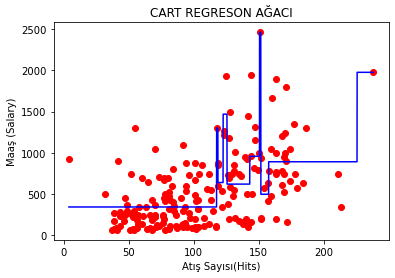

In [135]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X_train, y_train, color = 'red')

plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')

plt.title('CART REGRESON AĞACI')
plt.xlabel('Atış Sayısı(Hits)')
plt.ylabel('Maaş (Salary)');

In [ ]:
#Tek Değişkenli Tahmin

In [137]:
cart_model.predict(X_test)[0:5]

array([621.96792308, 958.61111111, 621.96792308, 345.20115517,
       345.20115517])

In [138]:
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

486.34593105235456

In [139]:
#Tüm Değişkenler

In [140]:
df = pd.read_csv("Hitters.csv")
df = df.dropna() #Eksik verilerden kurturuldu.
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']]) # One Hot Encoding yapıldı.
y = df["Salary"] #bağımlı değişkenimiz
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1) #kategorik değişkenleri dummy değişkenlerine çevirdik, bağımlı değişken ile bağımsız değişkenimizi ayırmış olduk.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [141]:
cart_model = DecisionTreeRegressor().fit(X_train, y_train)

In [142]:
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

473.4373441415005

## Model Tuning

In [144]:
cart_model

DecisionTreeRegressor()

In [150]:
cart_model = DecisionTreeRegressor(max_depth = 5).fit(X_train, y_train)
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

435.5080020622849

In [151]:
?cart_model

Type:        DecisionTreeRegressor
String form: DecisionTreeRegressor(max_depth=5)
File:        c:\users\zeynep\anaconda33\lib\site-packages\sklearn\tree\_classes.py
Docstring:  
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"mse", "friedman_mse", "mae"}, default="mse"
    The function to measure the quality of a split. Supported criteria
    are "mse" for the mean squared error, which is equal to variance
    reduction as feature selection criterion and minimizes the L2 loss
    using the mean of each terminal node, "friedman_mse", which uses mean
    squared error with Friedman's improvement score for potential splits,
    and "mae" for the mean absolute error, which minimizes the L1 loss
    using the median of each terminal node.

    .. versionadded:: 0.18
       Mean Absolute Error (MAE) criterion.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strate

In [152]:
cart_params = {"max_depth": [2, 3, 4, 5, 10, 20],
               "min_samples_split": [2, 10, 5, 30, 50, 10]}

In [160]:
cart_model = DecisionTreeRegressor()

In [161]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv =10).fit(X_train, y_train)

In [162]:
cart_cv_model.best_params_

{'max_depth': 4, 'min_samples_split': 50}

In [157]:
#final model

In [164]:
cart_tuned = DecisionTreeRegressor(max_depth = 4, min_samples_split =50).fit(X_train, y_train)

In [165]:
y_pred = cart_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

361.0876906511434

# Random Forest

In [167]:
df = pd.read_csv("Hitters.csv")
df = df.dropna() #Eksik verilerden kurturuldu.
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']]) # One Hot Encoding yapıldı.
y = df["Salary"] #bağımlı değişkenimiz
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1) #kategorik değişkenleri dummy değişkenlerine çevirdik, bağımlı değişken ile bağımsız değişkenimizi ayırmış olduk.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

## Model & Tahmin

In [169]:
rf_model = RandomForestRegressor(random_state = 42).fit(X_train, y_train)

In [170]:
rf_model

RandomForestRegressor(random_state=42)

In [171]:
#min_samples_split bir note bölünmeden önce buradaki min gözlem sayısını ifade eder,
#bu kadar gözlem varsa bölmeye devam et anlamı taşır.
#min_sample_leaf leaf noktadaki min gözlem sayısını ifade eder.
#n_estimators kullanılacak olan ağaç sayısını ifade eder.

In [172]:
y_pred = rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

345.00286717448006

In [175]:
rf_params = {"max_depth": [5,8,10], #max derinlik
             "max_features": [2,5,10], #bölünmelerde göz önünde bulundurulması gereken değişken sayısını ifade eder.
             "n_estimators": [200, 500, 1000, 2000],
            "min_samples_split": [2,10,80,100]}

In [176]:
rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10, n_jobs = -1, verbose =2).fit(X_train, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   37.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 18.2min finished


In [177]:
rf_cv_model.best_params_

{'max_depth': 8,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [179]:
rf_model = RandomForestRegressor(random_state =42,
                                max_depth =8,
                                max_features = 2,
                                min_samples_split = 2,
                                n_estimators = 2000)
rf_tuned = rf_model.fit(X_train, y_train)

In [180]:
rf_tuned

RandomForestRegressor(max_depth=8, max_features=2, n_estimators=2000,
                      random_state=42)

In [181]:
y_pred = rf_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

347.80335727496384

### Değişken Önem Düzeyi

In [183]:
rf_tuned.feature_importances_*100

array([ 5.44631822,  5.99828043,  3.59175963,  4.409788  ,  5.17445063,
        5.41025192,  5.7456839 ,  9.24408424,  9.53094597,  7.42417342,
       10.25975342,  9.05954245,  8.785369  ,  4.62825832,  2.11914569,
        1.73235463,  0.38383328,  0.61944521,  0.43656164])

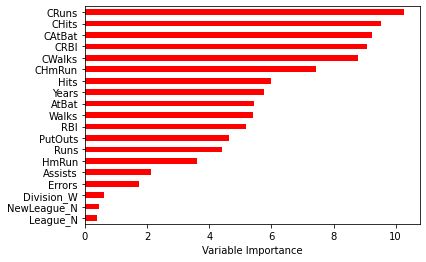

In [185]:
Importance = pd.DataFrame({'Importance': rf_tuned.feature_importances_*100},
                          index = X_train.columns)

Importance.sort_values(by = 'Importance', #Importance sütunu. Değerleri sıralamak için sort_values kullanıyoruz.
                      axis = 0, #Satır bazında anlamı taşır.
                      ascending = True).plot(kind = 'barh', #Büyükten küçüğe alamı taşır ascending.
                                            color = 'r',)
plt.xlabel('Variable Importance')
plt.gca().legend_ =None